In [8]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

## Logistic Regression

In [9]:
games = pd.read_csv('games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [10]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6616670764691419
Precision :	 0.6671976636134342
Recall    :	 0.953519256308101
F1 Score  :	 0.7850671665104655

TPR Train :	 0.953519256308101
TNR Train :	 0.12434509256025149

FPR Train :	 0.8756549074397485
FNR Train :	 0.04648074369189907

Precision:	 0.5923460898502496
Recall   :	 0.12434509256025149
F1-score :	 0.20554272517321018


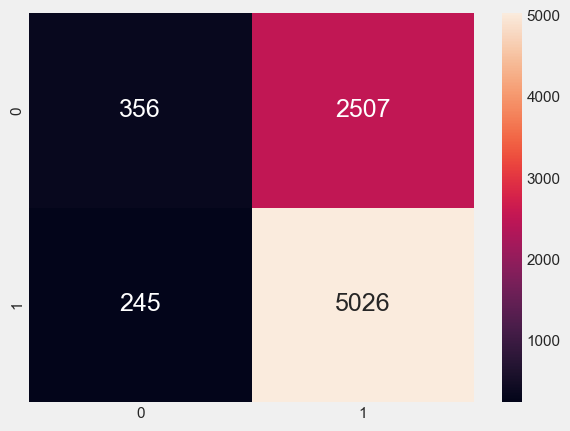

In [11]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6612162937464142
Precision :	 0.6671976636134342
Recall    :	 0.953519256308101
F1 Score  :	 0.7850671665104655

TPR Test :	 0.9530495831505046
TNR Test :	 0.11019055509527755

FPR Test :	 0.8898094449047225
FNR Test :	 0.04695041684949539

Precision:	 0.5923460898502496
Recall   :	 0.12434509256025149
F1-score :	 0.20554272517321018


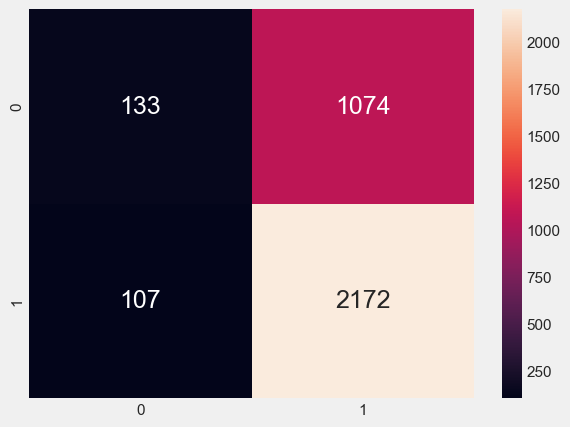

In [12]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

table = {'Accuracy': LogisticR.score(X_test, y_test), 'precision' : precision, 'recall': recall, 'f1_score' : f1_score}

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

# Logistic Regression - Oversampling

In [13]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


In [14]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.5961316093766424
Precision :	 0.5967548876180343
Recall    :	 0.8470832546724562
F1 Score  :	 0.7002184769038702

TPR Train :	 0.8470832546724562
TNR Train :	 0.2808349146110057

FPR Train :	 0.7191650853889943
FNR Train :	 0.1529167453275439

Precision:	 0.5937813440320963
Recall   :	 0.2808349146110057
F1-score :	 0.3813204508856683


Test Data
Accuracy  :	 0.6001962227127791
Precision :	 0.5967548876180343
Recall    :	 0.8470832546724562
F1 Score  :	 0.7002184769038702

TPR Test :	 0.8513093652907234
TNR Test :	 0.29002192982456143

FPR Test :	 0.7099780701754386
FNR Test :	 0.14869063470927651

Precision:	 0.5937813440320963
Recall   :	 0.2808349146110057
F1-score :	 0.3813204508856683


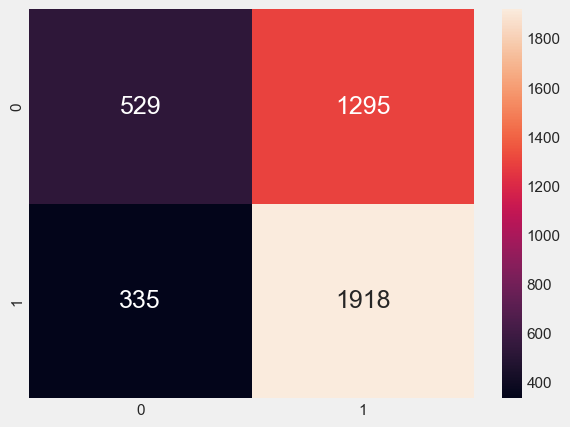

In [16]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


# Adding values to the table
newrow = {'Accuracy': LogisticR.score(X_test, y_test), 'precision' : precision, 'recall': recall, 'f1_score' : f1_score}
# Adding the new row to the table
table.update(newrow)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

# Logistic Regression - Balanced Resampled

In [17]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [18]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])
# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.5827814569536424
Precision :	 0.5814606741573034
Recall    :	 0.5880681818181818
F1 Score  :	 0.5847457627118644

TPR Train :	 0.5880681818181818
TNR Train :	 0.5775047258979206

FPR Train :	 0.4224952741020794
FNR Train :	 0.4119318181818182

Precision:	 0.5841300191204589
Recall   :	 0.5775047258979206
F1-score :	 0.5807984790874524


Test Data
Accuracy  :	 0.5916114790286976
Precision :	 0.5814606741573034
Recall    :	 0.5880681818181818
F1 Score  :	 0.5847457627118644

TPR Test :	 0.6114537444933921
TNR Test :	 0.5716814159292035

FPR Test :	 0.4283185840707965
FNR Test :	 0.38854625550660793

Precision:	 0.5841300191204589
Recall   :	 0.5775047258979206
F1-score :	 0.5807984790874524


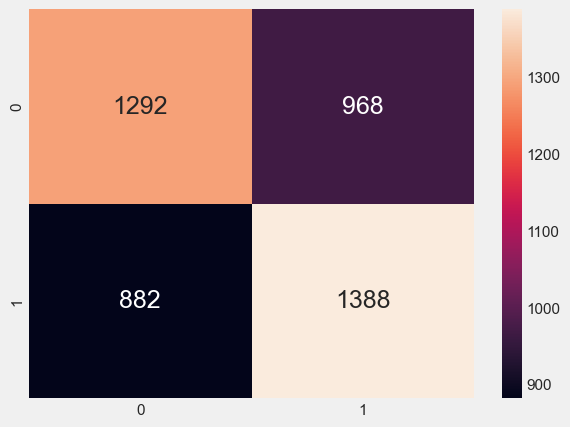

In [20]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Adding values to the table
newrow = {'Accuracy': LogisticR.score(X_test, y_test), 'precision' : precision, 'recall': recall, 'f1_score' : f1_score}
# Adding the new row to the table
table.update(newrow)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

In [21]:
table

{'Accuracy': 0.5916114790286976,
 'precision': 0.5814606741573034,
 'recall': 0.5880681818181818,
 'f1_score': <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>}